# MATH 210 Introduction to Mathematical Computing

## March 13, 2017

* Applications of linear algebra
    * Least squares regression
    * Linear regression for quadratic models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
%matplotlib inline

## Applications of linear algebra

### Least squares regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is the process of fitting a line to a collection of data. In particular, given a collection of points $(x_0,y_0), (x_1,y_1), \dots , (x_N,y_N)$, we would like to find coefficients $a$ and $b$ such that the line $y = a + bx$ passes through the points in an optimal way. This means we want to minimize the sum of squared errors:

$$
SSE = \sum_{i = 0}^N (y_i - (a + bx_i) )^2
$$

If we use the data points to form matrices $X$ and $Y$

$$
X = 
\begin{bmatrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_N
\end{bmatrix}
\ , \ \
Y = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
$$

then the coefficients $a$ and $b$ which minimize the sum of squared errors $SSE$ is the solution of

$$
(X^T X)A = (X^T)Y
$$

where

$$
A = 
\begin{bmatrix}
a \\
b
\end{bmatrix}
$$

Let's do an example with some fake data. Let's build a set of random points based on the model

$$
y = a + bx + \epsilon
$$

for some arbitrary choice of $a$ and $b$. The factor $\epsilon$ represents some random noise which we model using the normal distribution.

The goal is to demonstrate that we can use linear regression to retrieve the coefficeints $a$ and $b$.

In [2]:
a = 2
b = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a + b*x + noise

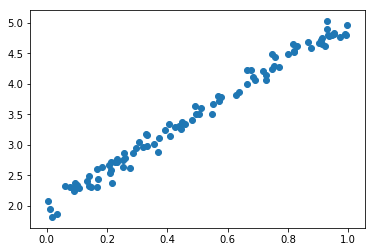

In [3]:
plt.scatter(x,y);

Let's use linear regression to retieve the coefficients $a$ and $b$.

To build the matrix $X$, we can use the function `numpy.hstack` but first we have to reshape the array $x$ from a 1D NumPy array of shape `(N,)` to a 2D NumPy array of shape `(N,1)`. Check the documentation:

In [4]:
np.hstack?

In [5]:
X = np.hstack((np.ones(N).reshape(N,1),x.reshape(N,1)))

In [6]:
X.shape

(100, 2)

Let's look at the first 5 rows of $X$ to see that it is in the correct form:

In [7]:
X[:5,:]

array([[ 1.        ,  0.32760668],
       [ 1.        ,  0.4583075 ],
       [ 1.        ,  0.28514094],
       [ 1.        ,  0.51144563],
       [ 1.        ,  0.56703478]])

Let's also reshape the 1D NumPy array into a 2D NumPy array representing a $N$ by $1$ column vector.

In [8]:
Y = y.reshape(N,1)

In [9]:
Y[:5,:]

array([[ 3.17633495],
       [ 3.33680705],
       [ 2.85952801],
       [ 3.59590518],
       [ 3.79627332]])

Use `scipy.linalg.solve` to solve $(X^T X)A = (X^T)Y$ for $A$.

In [10]:
A = la.solve(X.T @ X, X.T @ Y)

In [11]:
A

array([[ 1.98328331],
       [ 3.03882155]])

We have retrieved the coefficients of the model almost exactly! Let's plot the random data points with the linear regression we just computed.

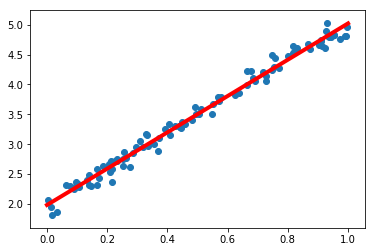

In [12]:
u = np.linspace(0,1,10)
v = A[0,0] + A[1,0]*u
plt.plot(u,v,'r',linewidth=4)
plt.scatter(x,y);

### Linear regression for quadratic models

The same idea works for fitting a quadratic model $y = a + bx + cx^2$ to a set of data points $(x_0,y_0), \dots , (x_N,y_N)$. We form the matrices as before but now the matrix $X$ has 3 columns

$$
X = 
\begin{bmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2\\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix}
\ , \ \ 
Y = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
$$

The coefficients $a$, $b$ and $c$ which minimize the sum of squared errors $SSE$ is the solution of

$$
(X^T X)A = (X^T)Y
$$

where now

$$
A = 
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
$$

Let's build some fake data using a quadratic model $y = a + bx + cx^2 + \epsilon$ and use linear regression to retrieve the coefficients $a$, $b$ and $c$.

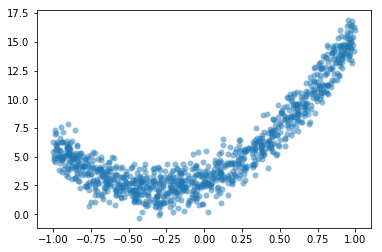

In [13]:
a = 3
b = 5
c = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a + b*x + c*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0);

We use `np.hstack` to build the matrix $X$. Notice that we use the `reshape` method to transform 1D NumPy arrays into 2D NumPy arrays representing column vectors.

In [14]:
X = np.hstack((np.ones(N).reshape(N,1),x.reshape(N,1),(x**2).reshape(N,1)))

In [15]:
Y = y.reshape(N,1)

Use `scipy.linalg.solve` to solve $(X^T X)A = (X^T)Y$ for $A$:

In [16]:
A = la.solve((X.T @ X),X.T @ Y)

Let's plot the results:

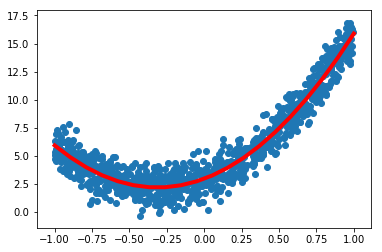

In [17]:
u = np.linspace(-1,1,20)
v = A[0,0] + A[1,0]*u + A[2,0]*u**2
plt.plot(u,v,'r',linewidth=4)
plt.scatter(x,y);